## Algoritmo Hierarchical Clustering
##### por Javier Vallejos


### 1. Descripción

El algoritmo Hierarchical Clustering (Agrupamiento Jerárquico) es un enfoque de clustering utilizado para agrupar datos en una estructura jerárquica de clústeres. A diferencia de otros métodos de clustering, el Clustering Jerarquico no requiere que especifiques el número de clústeres de antemano. En cambio, crea una jerarquía de clústeres donde los clústeres más pequeños están contenidos dentro de clústeres más grandes, formando un árbol o dendrograma.

### 2. Birtex y Referencias:

* @article{berzal2017clustering,
  title={Clustering jer{\'a}rquico},
  author={Berzal, Fernando},
  journal={Universidad de Granada,[En l{\'\i}nea]. Available: https://elvex. ugr. es/idbis/dm/slides/42\% 20Clustering},
  year={2017}
}

### 3. Tipo de Modelo:

**Método de Aprendizaje:**Es un método de aprendizaje no supervisado. En el aprendizaje no supervisado, el algoritmo explora patrones y estructuras en los datos sin utilizar etiquetas o resultados previos. En el caso del clustering jerárquico, los objetos se agrupan en clústeres en función de su similitud, sin que se proporcionen etiquetas o categorías de antemano.

**Por Parámetro:** Clustering Jerárquico es un enfoque que no se basa en parámetros que se optimizan durante el entrenamiento. No ajusta parámetros internos del algoritmo según los datos de entrada. Más bien, requiere que tomes decisiones sobre cómo se llevará a cabo el proceso de agrupamiento, como la elección de métodos de enlace, métricas de distancia y criterios de corte.

**Datos de Aprendizaje:** Funciona en un enfoque "offline"  lo que significa que opera en un conjunto de datos fijo y no se adapta a nuevos datos que llegan de manera continua.

**Resultado del Entrenamiento:** Ealgoritmo de Clustering Jerárquico no es un "modelo" ya que el resultado es una estructura jerárquica de clústeres que puede representarse visualmente a través de un dendrograma.


### 4. Algoritmos de Entrenamiento:

•	BIRCH: Balanced Iterative Reducing and Clustering using Hierarchies (Zhang, Ramakrishnan & Livny, SIGMOD’1996)

•	CURE: Clustering Using REpresentatives (Guha, Rastogi & Shim, SIGMOD’1998)

•	ROCK: RObust Clustering using linKs (Guha, Rastogi & Shim, ICDE’1999)

•	CHAMELEON: Hierarchical Clustering Using Dynamic Modeling (Karypis, Han & Kumar, 1999)

BIRCH: Se basa en una estructura de datos jerárquica llamada CF Tree [Clustering Feature Tree]

FASE 1: Se construye un árbol CF inicial en memoria (compresión “multi-nivel” de los datos que intenta preservar la estructura de los agrupamientos del conjunto de datos original).

FASE 2: Se utiliza un algoritmo de clustering arbitrario para agrupar los nodos hoja del árbol CF (p.ej. cualquier algoritmo jerárquico aglomerativo). Clustering Feature (CF): CF = (N, LS, SS) N: Number of data points LS: linear sum of N points SS: square sum of N points.

El árbol CF es un árbol balanceado en el que los nodos internos almacenan las sumas de los CFs de sus descendientes.

Un árbol CF tiene dos parámetros: el número máximo de hijos de un nodo y el diámetro máximo de los subclusters almacenados en las hojas del árbol.

Para cada punto, se encuentra la hoja más cercana, se añade a su cluster y se actualiza su CF. Si el diámetro del subcluster es mayor que el diámetro máximo admitido, se divide la hoja (y puede que sus ascendientes).

ROCK [Agrupación robusta mediante enlaces]:
Número de vecinos compartidos Una medida de similitud más:


### 5. Supuestos y Restricciones:


El algoritmo de Clustering Jerárquico no está basado en supuestos específicos como algunos algoritmos de regresión o clasificación. Sin embargo, hay algunas consideraciones y restricciones que debes tener en cuenta al utilizar este enfoque:

**1. Métrica de Distancia :**
Debes elegir una métrica de distancia adecuada para calcular la similitud entre puntos de datos o clústeres. La elección de la métrica puede afectar los resultados del agrupamiento. Es importante seleccionar una métrica que tenga sentido para tus datos y el problema que estás abordando.

**2. Sensibilidad a la Escala:**
El Clustering Jerárquico puede ser sensible a la escala de las variables. Si algunas variables tienen escalas muy diferentes, es posible que la métrica de distancia sea dominada por las variables con mayor escala. La normalización o estandarización de los datos puede ser necesaria para mitigar este problema.

**3. Complejidad Computacional:**
El Clustering Jerárquico puede volverse computacionalmente intensivo, especialmente en conjuntos de datos grandes. El cálculo de distancias y la construcción del dendrograma pueden requerir mucho tiempo y recursos en datasets extensos.

**4. Elección del Método de Enlace:**
Debes decidir qué método de enlace utilizar para calcular la distancia entre clústeres durante el proceso de agrupamiento. Los diferentes métodos pueden conducir a agrupamientos ligeramente diferentes. La elección del método de enlace puede depender de la estructura de tus datos y tus objetivos.

**5. Interpretación del Dendrograma:**
Interpretar el dendrograma puede ser subjetivo y depende de tus objetivos de análisis. Decidir dónde cortar el dendrograma para formar clústeres puede afectar la interpretación de los resultados. No hay una regla estricta para determinar cuántos clústeres son los adecuados.

**6. No Adaptable en Línea:**
El Clustering Jerárquico no se adapta bien a nuevos datos en tiempo real. Una vez que se construye el dendrograma, es difícil agregar nuevos datos o ajustar los clústeres de manera eficiente.



### 6. Ejemplo

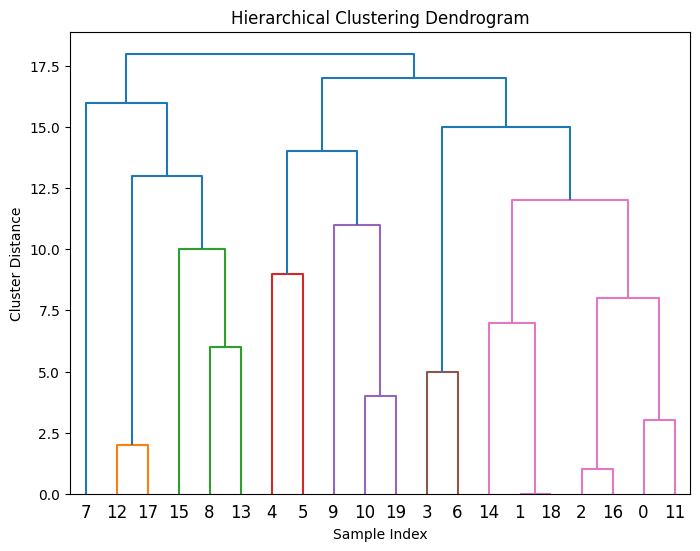

Cluster labels at threshold = 0.5
[16 19 18 14 10 17 13 15  6  7  8 11  3  9 12  4  5  2  1  0]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Generate some sample data
np.random.seed(0)
n_samples = 20
X = np.random.rand(n_samples, 2)

# Perform hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(X)

# Plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix
    children = model.children_
    distances = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0] + 2)
    linkage_matrix = np.column_stack([children, distances, no_of_observations]).astype(float)
    
    # Plot dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(8, 6))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agg_clustering)
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

# You can also retrieve the cluster assignments at a certain distance threshold
distance_threshold = 0.5
cluster_labels = agg_clustering.labels_

print("Cluster labels at threshold =", distance_threshold)
print(cluster_labels)
